In [2]:
import numpy as np
import matplotlib.pyplot as plt

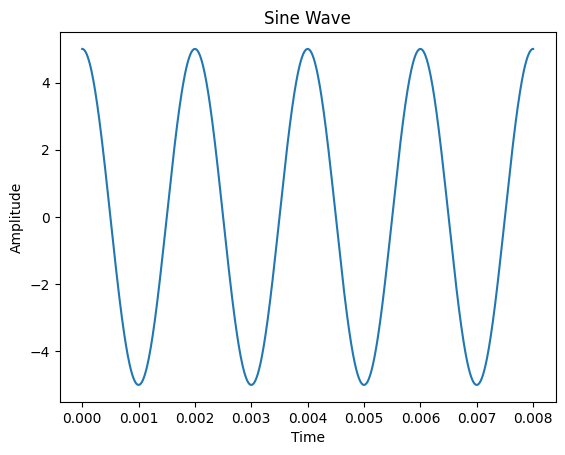

In [3]:
t = np.linspace(0, 0.008, 1000)
y = 5 * np.sin(2 * np.pi * 500 * t + np.radians(90))
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()

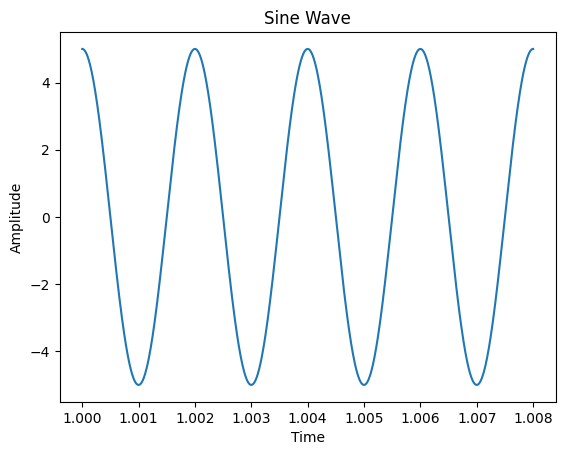

In [4]:
t_shifted = t + 1
plt.plot(t_shifted, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()

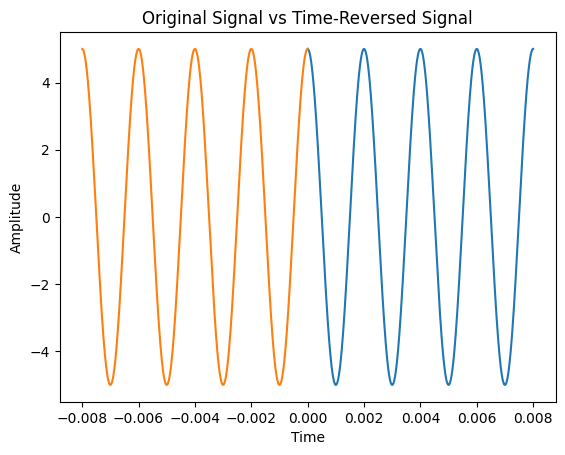

In [5]:
plt.plot(t, y, label='Original Signal')

t_reversed = -t[::-1]
y_reversed = y[::-1]

plt.plot(t_reversed, y_reversed)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Signal vs Time-Reversed Signal')
plt.show()


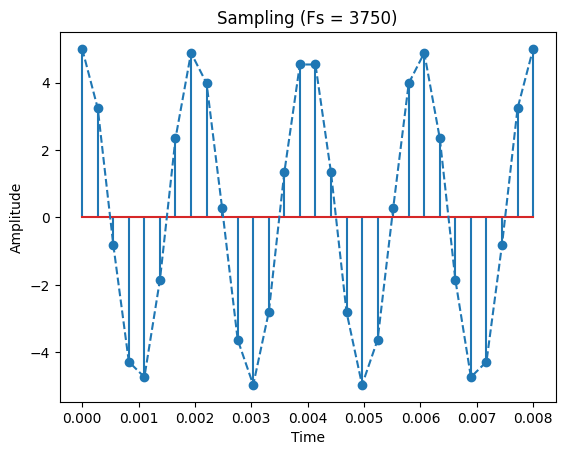

In [6]:
sampling_t = np.linspace(0, 0.008, 30) # 3750
sampling_y = 5 * np.sin(2 * np.pi * 500 * sampling_t + np.radians(90))
plt.stem(sampling_t, sampling_y)
plt.plot(sampling_t, sampling_y, linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampling (Fs = 3750)')
plt.show()

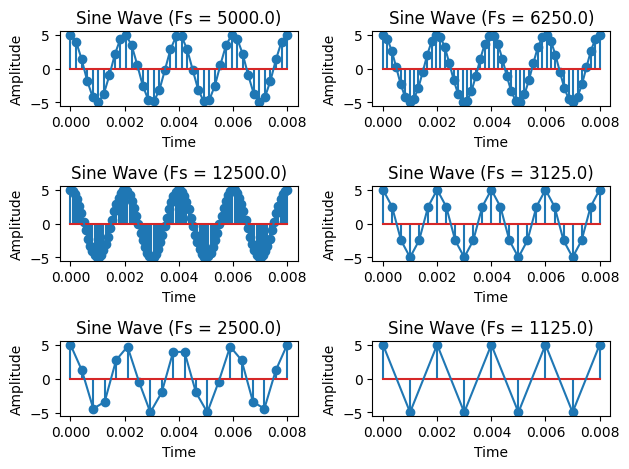

In [7]:
Fs = [40, 50, 100, 25, 20, 9]
for i in range(len(Fs)):
    sampling_t = np.linspace(0, 0.008, Fs[i])
    sampling_y = 5 * np.sin(2 * np.pi * 500 * sampling_t + np.radians(90))
    plt.subplot(3, 2, i+1)
    plt.stem(sampling_t, sampling_y)
    plt.plot(sampling_t, sampling_y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Sine Wave (Fs = {})'.format(Fs[i]/0.008))
plt.tight_layout()
plt.show()

In [8]:
def encode_to_binary(quantized_values, num_bits):
    levels = 2 ** num_bits
    min = np.min(quantized_values)
    binary_values = []
    for value in quantized_values:
        binary_value = np.round((value - min) / levels)
        binary_values.append(binary_value)
    return binary_values

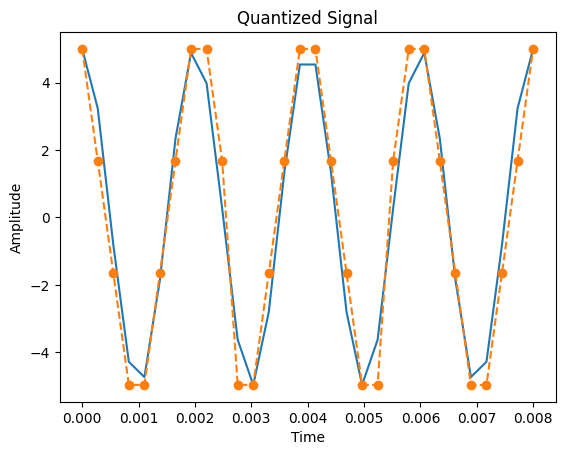

In [10]:
sampling_t = np.linspace(0, 0.008, 30)
sampling_y = 5 * np.sin(2 * np.pi * 500 * sampling_t + np.radians(90))
# print(sampling_t)
# print(sampling_y)
number_of_bits = 2
min_y = np.min(sampling_y)
max_y = np.max(sampling_y)
step_size = (max_y - min_y) / (2 ** number_of_bits - 1)
# print(step_size)
quantized_y = np.round((sampling_y - min_y) / step_size) * step_size + min_y
# print(sampling_y)
quantized_y = np.round(quantized_y, 2)
# print(quantized_y)
# print(encode_to_binary(quantized_y, number_of_bits))
plt.plot(sampling_t, sampling_y)
plt.plot(sampling_t, quantized_y, linestyle="--", marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quantized Signal')
plt.show()